In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

# Chloropleth

In [2]:
state = pd.read_excel("datafile (1).xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
states = pd.read_csv("states.txt",sep='\t', header=None)

In [4]:
states[2] = state[2011]

In [5]:
states.to_csv('states2.txt', sep='\t', index=False)

In [6]:
df = pd.read_excel("fert_small.xls").iloc[:,[0,3]]
df.columns = ["State", "Fertility Rate"]

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [7]:
df2 = pd.read_excel("datafile (6).xls")
df2.columns = ["State", "Fertility Rate"]
df2 = df2[df2.State != "India"]

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [8]:
df3 = df.append(df2).sort_values(by="State").reset_index(drop=True)

In [9]:
df3 = df3.drop(index = 31)
df3 = df3.drop(index = 35)
df3.iloc[23,0] = 'Delhi'

In [10]:
df3 = df3.sort_values(by = "State").reset_index(drop=True)

In [11]:
states[2] = df3["Fertility Rate"]

In [12]:
states.to_csv('states3.txt', sep='\t', index=False)

Copy txt file to this link - https://gramener.com/indiamap/

Generates the following map:

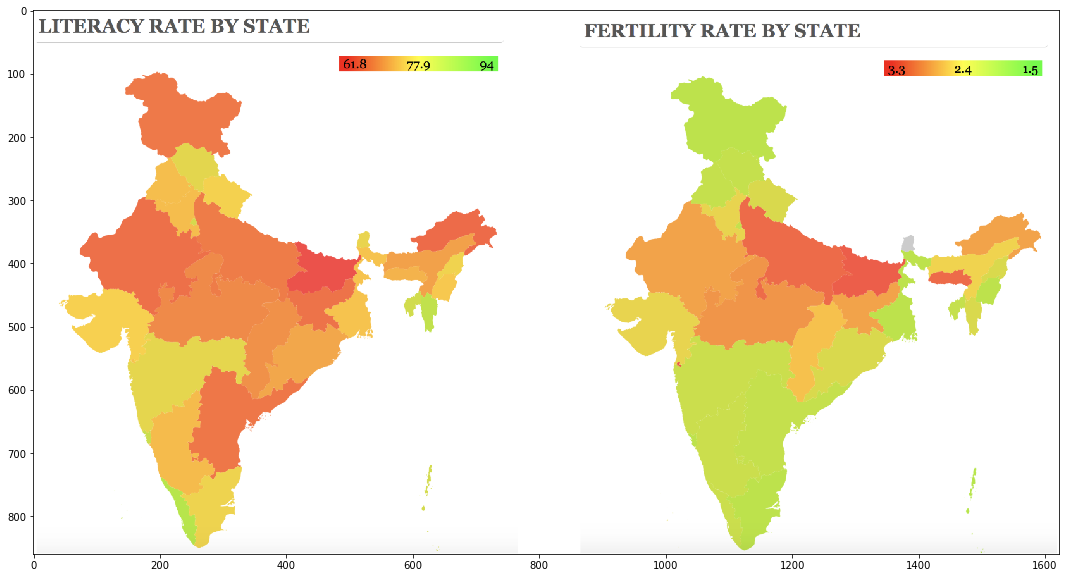

In [13]:
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(cv2.imread("literacy_fertility_map.png"),cv2.COLOR_BGR2RGB))
plt.show()

In [77]:
state = pd.read_excel("datafile (3).xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [78]:
state.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7


In [22]:
sel_cols = ["State_UT","Primary_Boys","Primary_Girls","Upper_Primary_Boys","Upper_Primary_Girls",
            "Secondary_Boys","Secondary_Girls","Higher_Secondary_Boys","Higher_Secondary_Girls"]
state = state[state["Year"] == "2014-15"].iloc[:-1,:][sel_cols]

In [28]:
state = state.drop(index = 31)

In [29]:
state = state.reset_index(drop=True)

In [43]:
state.head()

,State_UT,Primary_Boys,Primary_Girls,Upper_Primary_Boys,Upper_Primary_Girls,Secondary_Boys,Secondary_Girls,Higher_Secondary_Boys,Higher_Secondary_Girls,Primary_Diff,Upper_Primary_Diff,Secondary_Diff,Higher_Secondary_Diff
0,Andaman & Nicobar Islands,92.91,88.94,90.57,84.71,95.59,90.13,98.65,92.51,-3.97,-5.86,-5.46,-6.14
1,Andhra Pradesh,88.31,88.11,79.34,79.61,71.46,73.42,51.27,52.03,-0.20,0.27,1.96,0.76
2,Arunachal Pradesh,128.78,127.45,120.11,125.01,93.11,90.10,68,69.44,-1.33,4.90,-3.01,1.44
3,Assam,113.39,116.60,90.10,101.94,69.36,80.57,32.71,35.4,3.21,11.84,11.21,2.69
4,Bihar,98.09,104.35,89.84,107.70,65.08,73.85,31.91,31.66,6.26,17.86,8.77,-0.25


In [51]:
def isnumber(x):
    try:
        round(float(x),2)
        return True
    except:
        return False

state_tr = state.iloc[:,1:]
state.iloc[:,1:] = state_tr[state_tr.applymap(isnumber)]

In [52]:
state["Primary_Diff"] = state.Primary_Girls - state.Primary_Boys
state["Upper_Primary_Diff"] = state.Upper_Primary_Girls - state.Upper_Primary_Boys
state["Secondary_Diff"] = state.Secondary_Girls - state.Secondary_Boys
state["Higher_Secondary_Diff"] = state.Higher_Secondary_Girls - state.Higher_Secondary_Boys

In [53]:
state.head()

,State_UT,Primary_Boys,Primary_Girls,Upper_Primary_Boys,Upper_Primary_Girls,Secondary_Boys,Secondary_Girls,Higher_Secondary_Boys,Higher_Secondary_Girls,Primary_Diff,Upper_Primary_Diff,Secondary_Diff,Higher_Secondary_Diff
0,Andaman & Nicobar Islands,92.91,88.94,90.57,84.71,95.59,90.13,98.65,92.51,-3.97,-5.86,-5.46,-6.14
1,Andhra Pradesh,88.31,88.11,79.34,79.61,71.46,73.42,51.27,52.03,-0.20,0.27,1.96,0.76
2,Arunachal Pradesh,128.78,127.45,120.11,125.01,93.11,90.10,68,69.44,-1.33,4.90,-3.01,1.44
3,Assam,113.39,116.60,90.10,101.94,69.36,80.57,32.71,35.4,3.21,11.84,11.21,2.69
4,Bihar,98.09,104.35,89.84,107.70,65.08,73.85,31.91,31.66,6.26,17.86,8.77,-0.25


In [54]:
states = pd.read_csv("states.txt",sep='\t', header=None)

In [71]:
def int_cnvrt(x):
    try:
        int(x)
        return int(x)
    except:
        return x

In [72]:
states1 = states.copy()
states1[2] = state["Primary_Diff"]
states1 = states1.round(1)

states2 = states.copy()
states2[2] = state["Upper_Primary_Diff"]
states2 = states2.applymap(int_cnvrt)

states3 = states.copy()
states3[2] = state["Secondary_Diff"]
states3 = states3.applymap(int_cnvrt)

states4 = states.copy()
states4[2] = state["Higher_Secondary_Diff"]
states4 = states4.applymap(int_cnvrt)

In [73]:
states1.to_csv('primary.txt', sep='\t', index=False)
states2.to_csv('upper_primary.txt', sep='\t', index=False)
states3.to_csv('secondary.txt', sep='\t', index=False)
states4.to_csv('higher_secondary.txt', sep='\t', index=False)

Again, copy txt files to this link - https://gramener.com/indiamap/

Generates the following maps:

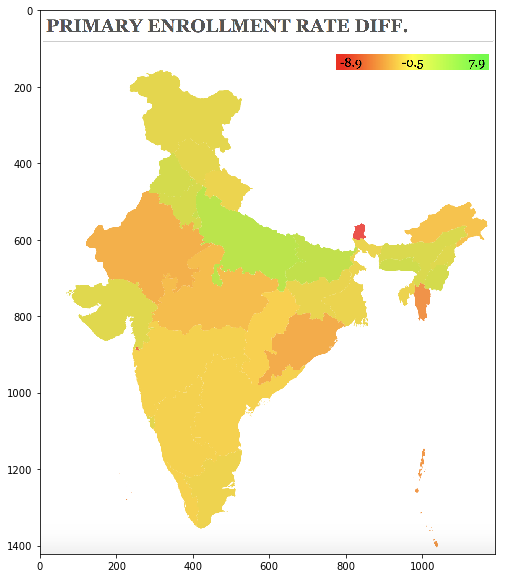

In [5]:
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(cv2.imread("primary_enrollment_diff.png"),cv2.COLOR_BGR2RGB))
plt.show()

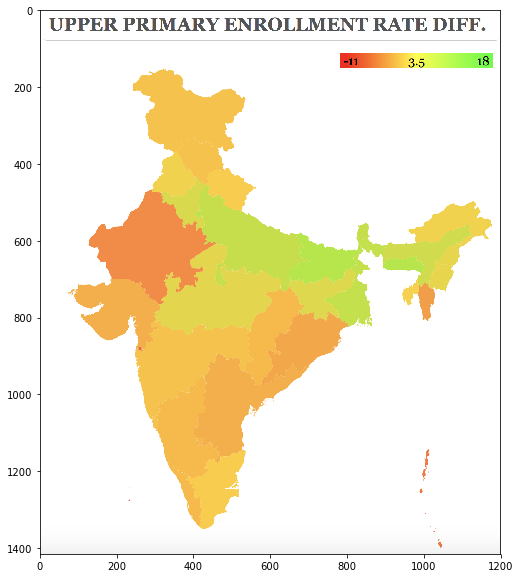

In [6]:
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(cv2.imread("upper_primary_enrollment_diff.png"),cv2.COLOR_BGR2RGB))
plt.show()

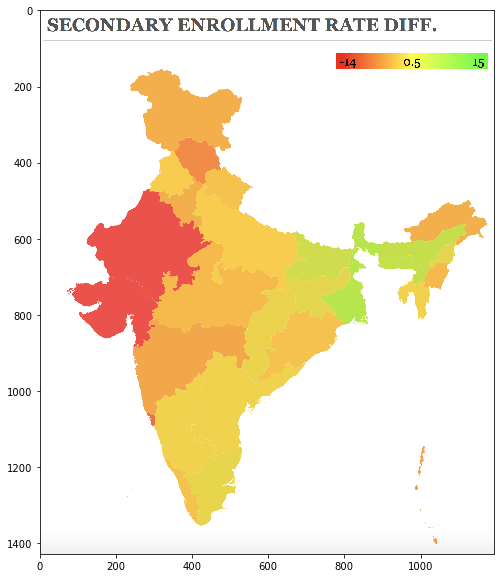

In [7]:
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(cv2.imread("secondary_enrollment_diff.png"),cv2.COLOR_BGR2RGB))
plt.show()

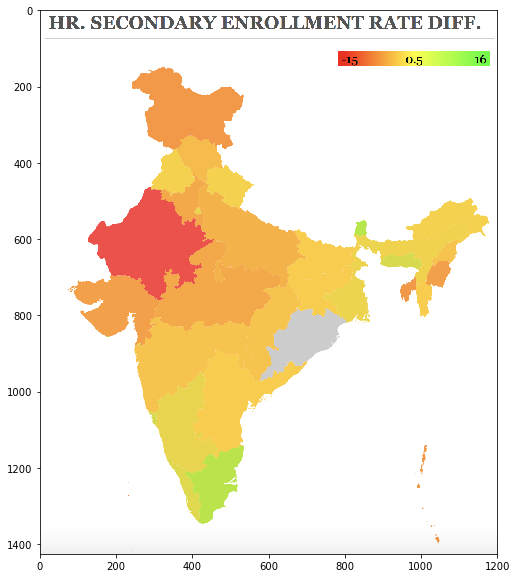

In [8]:
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(cv2.imread("hr_secondary_enrollment_diff.png"),cv2.COLOR_BGR2RGB))
plt.show()

# Stacked Area Graph

In [15]:
literacy_year_wise = pd.read_excel("datafile.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [16]:
literacy_year_wise

,Particulars,1951,1961,1971,1981,1991,2001,2011
0,Total,18.3,28.3,34.5,43.6,52.2,64.8,74.04
1,Male,27.2,40.4,46.0,56.4,64.1,75.3,82.14
2,Female,8.9,15.4,22.0,29.8,39.3,53.7,65.46


In [82]:
trace1 = go.Scatter(
    name='Female Literacy Rate',
    y=literacy_year_wise.iloc[2,1:].values,
    x=state.columns[1:],
    fill='tozeroy',
    mode= 'none'
)
trace2 = go.Scatter(
    name='Overall Literacy Rate',
    y=literacy_year_wise.iloc[0,1:].values,
    x=state.columns[1:],
    fill='tonexty',
    mode= 'none'
)
trace3 = go.Scatter(
    name='Male Literacy Rate',
    y=literacy_year_wise.iloc[1,1:].values,
    x=state.columns[1:],
    fill='tonexty',
    mode= 'none'
)

layout = go.Layout(
    title='Literacy Rates India Yearwise',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Literacy Rate (%)'
    ),
)

data = [trace1, trace2, trace3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='lit_rates_ind_yearwise')

# Barplot

In [18]:
literacy_min = pd.read_csv("literacy_min.csv")

In [19]:
literacy_min.sort_values(' Total  ',ascending=False, inplace= True)

In [20]:
literacy_min.reset_index(inplace=True,drop=True)

In [21]:
literacy_min

,Community/Caste,Male,Female,Total
0,Christian,844,762,803
1,Buddhist,831,617,727
2,Sikh,752,631,694
3,Hindu,762,532,651
4,India,753,537,648
5,Muslim,676,501,591
6,Scheduled Castes,666,419,547
7,Others,608,332,470


In [83]:
trace1 = go.Bar(
    name='Male Literacy Rate',
    x=literacy_min[' Community/Caste  '],
    y=literacy_min[' Male  '],
    text=literacy_min[' Male  '],
    textposition = 'auto',
    opacity=0.6
)

trace2 = go.Bar(
    name='Overall Literacy Rate',
    x=literacy_min[' Community/Caste  '],
    y=literacy_min[' Total  '],
    text=literacy_min[' Total  '],
    textposition = 'auto',
    opacity=0.6
)

trace3 = go.Bar(
    name='Female Literacy Rate',
    x=literacy_min[' Community/Caste  '],
    y=literacy_min[' Female  '],
    text=literacy_min[' Female  '],
    textposition = 'auto',
    opacity=0.6
)

layout = go.Layout(
    title='Literacy Rates For Religious Groups and Minorities',
    xaxis=dict(
        title='Religious Groups and Minorities'
    ),
    yaxis=dict(
        title='Literacy Rate (per 1000)'
    ),
)

data = [trace1,trace2,trace3]
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Literacy_Rate_Min')

# Box plot

In [23]:
year_state_wise_lit_rate = pd.read_excel("datafile (1).xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [24]:
year_state_wise_lit_rate.head()

,State/ UTs,1951,1961,1971,1981,1991,2001,2011
0,Andaman and Nicobar Islands,30.30,40.07,51.15,63.19,73.02,81.30,86.6
1,Andhra Pradesh,NaN,21.19,24.57,35.66,44.08,60.47,67.0
2,Arunachal Pradesh,NaN,7.13,11.29,25.55,41.59,54.34,65.4
3,Assam,18.53,32.95,33.94,NaN,52.89,63.25,72.2
4,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.8


In [95]:
x_data = year_state_wise_lit_rate.columns[1:]

traces = []

for xd in x_data:
    traces.append(go.Box(
        y=year_state_wise_lit_rate[xd],
        name=xd,
        boxpoints='all',
        jitter=0.5,
        whiskerwidth=0.2,
        marker=dict(
            size=2,
        ),
        line=dict(width=1),
    ))

layout = go.Layout(
    title='Year Wise Literacy Rates for Indian States',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Literacy Rate (%)',
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='Literacy rate year and state wise ')

# Histogram

In [26]:
lit_rate_social_groups = pd.read_csv("Literacy rate, by social groups (rural), 2007-08.csv")

In [27]:
lit_rate_social_groups.head()

,Category of States,States,Scheduled Castes - Male,Scheduled Castes - Female,Scheduled Castes - Person,Scheduled Tribes - Male,Scheduled Tribes - Female,Scheduled Tribes - Person,Other Backward Classes - Male,Other Backward Classes - Female,Other Backward Classes - Person,Others - Male,Others - Female,Others - Person
0,Non Special Category States,Andhra Pradesh,66.4,50.4,58.4,63.8,45.9,54.7,70.8,51.7,61.2,80.4,63.5,72.0
1,Non Special Category States,Assam,86.0,67.7,76.9,92.9,79.8,86.6,91.6,81.9,87.0,85.0,74.0,79.7
2,Non Special Category States,Bihar,56.4,31.8,45.0,66.0,33.5,49.4,72.9,45.7,60.0,83.8,64.9,74.8
3,Non Special Category States,Chhattisgarh,79.9,60.8,70.7,72.1,51.2,61.8,82.2,61.4,72.2,92.6,70.6,82.0
4,Non Special Category States,Delhi,90.1,68.5,80.2,NaN,NaN,NaN,89.4,72.7,82.0,97.1,77.5,88.7


In [96]:
x0 = lit_rate_social_groups["Scheduled Tribes - Person"]
x1 = lit_rate_social_groups["Scheduled Castes - Person"]
x2 = lit_rate_social_groups["Other Backward Classes - Person"]
x3 = lit_rate_social_groups["Others - Person"]

trace0 = go.Histogram(
    name="Scheduled Tribes",
    x=x0,
    opacity=0.75
)
trace1 = go.Histogram(
    name="Scheduled Castes",
    x=x1,
    opacity=0.75
)
trace2 = go.Histogram(
    name="Other Backward Classes",
    x=x2,
    opacity=0.75
)
trace3 = go.Histogram(
    name="Others",
    x=x3,
    opacity=0.75
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title='Literacy rate, by social groups (rural), 2007-08',
    xaxis=dict(
        title='Literacy rate(%)'
    ),
    yaxis=dict(
        title='Number of States'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Literacy rate, by social groups (rural), 2007-08')

# Heat Map

In [29]:
enrolment = pd.read_excel("State and category wise male and female student enrolment for all education institution - 2011-12 to 2012-13.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [30]:
enrolment = enrolment[enrolment["Year"] == "2011-2012"]
enrolment.reset_index(drop=True, inplace=True)

In [89]:
final_df = pd.DataFrame()
final_df["State"] = enrolment.State 

In [90]:
for i,col in enumerate(enrolment.columns):
    if col[-6:] == "Female":
        final_df[col.split("-")[-2]] = enrolment.iloc[:,i]/(enrolment.iloc[:,i]+enrolment.iloc[:,i-1])    

In [91]:
final_df = final_df.sort_values(' Total ',ascending=False)
final_df.head()

,State,Total,SC,ST,OBC,PWD,Muslim,Other Minority Communities,Foreign Students
18,Lakshadweep,0.718509,NaN,0.752475,NaN,NaN,NaN,NaN,NaN
17,Kerala,0.574425,0.630121,0.530256,0.592926,0.391784,0.590650,0.589797,0.281915
5,Chandigarh,0.549161,0.551142,0.504514,0.413148,0.289256,0.259259,0.299954,0.390093
10,Goa,0.525890,0.538110,0.578638,0.558176,0.636364,0.515113,0.670898,0.152778
22,Meghalaya,0.523025,0.455782,0.547174,0.280876,0.375000,0.150820,0.485820,0.453333


In [92]:
trace = go.Heatmap(z=[final_df[col][:-1] for col in final_df.columns[1:]],
                   x=final_df.State[:-1],
                   y=final_df.columns[1:])
data=[trace]
layout = go.Layout(
    title='Female Enrolment Percentage by State and Category, 2011-12',
    xaxis=dict(
        title='State / Union Territory'
    ),
    yaxis=dict(
        title='Category'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='State and category wise female student enrolment ratio - 2011-12 to 2012-13')

# Scatter plot

In [35]:
df1 = pd.read_excel("n_primary_schools.xls")
df2 = pd.read_excel("n_secondary_schools.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [36]:
df1 = df1[df1["India/ State/ UTs"] == "India"]

In [37]:
df2 = df2[df2["India/ State/ UTs"] == "India"].iloc[:,:-4]

In [38]:
schools_df = df1.append(df2)

In [39]:
schools_df

,School Type,India/ State/ UTs,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Primary School,India,"6,64,041.00","6,51,382.00","7,12,239.00","7,67,520.00","7,71,082.00","7,84,852.00","7,87,827.00","7,78,825.00","8,19,945.00","7,48,547.00"
36,Upper Primary School,India,"2,19,626.00","2,45,274.00","2,62,286.00","2,74,731.00","2,88,199.00","3,05,584.00","3,25,174.00","3,65,643.00","3,94,126.00","4,47,600.00"
0,Secondary School,India,133492,137207,145962,152049,159667,169568,172990,186310,193888,200184
36,Lower Secondary School,India,91435,90760,99140,101777,106024,112165,113824,122081,122208,128370
72,Senior Secondary School,India,42057,46447,46822,50272,53643,57403,59166,64229,71680,71814


In [93]:
trace1 = go.Scatter(
    name='Primary School',
    y=schools_df.iloc[0,2:].values,
    x=schools_df.columns[2:],
)
trace2 = go.Scatter(
    name='Upper Primary School',
    y=schools_df.iloc[1,2:].values,
    x=schools_df.columns[2:],
)
trace3 = go.Scatter(
    name='Secondary School',
    y=schools_df.iloc[2,2:].values,
    x=schools_df.columns[2:],
)
trace4 = go.Scatter(
    name='Lower Secondary School',
    y=schools_df.iloc[3,2:].values,
    x=schools_df.columns[2:],
)
trace5 = go.Scatter(
    name='Senior Secondary School',
    y=schools_df.iloc[4,2:].values,
    x=schools_df.columns[2:],
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Number of Schools By Level (2001-2010)',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Number of Schools'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='schools')

# Tree Map

Done in `tree_map.twb`

# Bubble Map

Done in `bubble_map.twb`

# Connection Map

Done in `connection_map.twb`